**Atualizando a biblioteca para plotagem de gráficos**


In [325]:
!pip -q install plotly --upgrade

**Para balanceamento de classes, veja os métodos em:**

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html 

**Importando bibliotecas**

In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [327]:
base = pd.read_csv('/content/sample_data/cancer2.csv', ';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [328]:
base

,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,03/mai,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,06/ago,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,03/mai,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,06/ago,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


**Verificando se tem ausência de dados**

In [329]:
base.isnull()

,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
281,False,False,False,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False,False,False,False
283,False,False,False,False,False,False,False,False,False,False
284,False,False,False,False,False,False,False,False,False,False


In [330]:
base.isnull().sum()

age           0
menopause     0
tumorsize     0
invnodes      0
nodecaps      8
degmalig      0
breast        0
breastquad    1
irradiat      0
Class         0
dtype: int64

**Verificando uma instância antes da imputação**

In [331]:
X_comNAN = base.iloc[20, 0:10]

In [332]:
X_comNAN 

age                       50-59
menopause                  lt40
tumorsize                 20-24
invnodes                    0-2
nodecaps                    NaN
degmalig                      1
breast                     left
breastquad             left_low
irradiat                     no
Class         recurrence-events
Name: 20, dtype: object

**Imputando dados ausentes pela MODA**

In [333]:
base['nodecaps'].fillna(base['nodecaps'].mode()[0], inplace=True)

In [334]:
base['breastquad'].fillna(base['breastquad'].mode()[0], inplace=True)

In [335]:
base.isnull().sum()

age           0
menopause     0
tumorsize     0
invnodes      0
nodecaps      0
degmalig      0
breast        0
breastquad    0
irradiat      0
Class         0
dtype: int64

**Verificando a instância depois da imputação**

In [336]:
X_imputado = base.iloc[20, 0:10]

In [337]:
X_imputado

age                       50-59
menopause                  lt40
tumorsize                 20-24
invnodes                    0-2
nodecaps                     no
degmalig                      1
breast                     left
breastquad             left_low
irradiat                     no
Class         recurrence-events
Name: 20, dtype: object

**Contando a quantidade de opções que temos em cada atributo**

In [338]:
len(np.unique(base['age'])), len(np.unique(base['menopause'])), len(np.unique(base['tumorsize'])), len(np.unique(base['invnodes'])), len(np.unique(base['breastquad']))

(6, 3, 11, 7, 5)

**Contando quantidade de instâncias**


In [339]:
np.unique(base['Class'], return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([201,  85]))

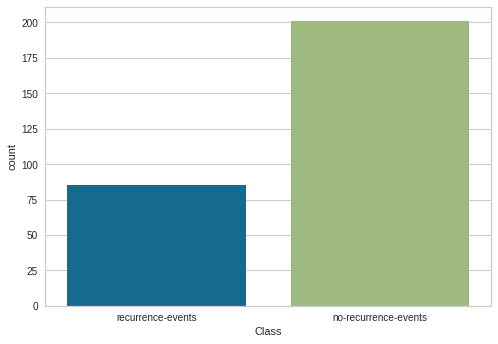

In [340]:
sns.countplot(x = base['Class']);

**Separando os atributos de entrada e de classe**

In [341]:
X_prev = base.iloc[:, 0:9].values

In [342]:
X_prev

array([['40-49', 'premeno', '15-19', ..., 'right', 'left_up', 'no'],
       ['50-59', 'ge40', '15-19', ..., 'right', 'central', 'no'],
       ['50-59', 'ge40', '35-39', ..., 'left', 'left_low', 'no'],
       ...,
       ['30-39', 'premeno', '30-34', ..., 'right', 'right_up', 'no'],
       ['50-59', 'premeno', '15-19', ..., 'right', 'left_low', 'no'],
       ['50-59', 'ge40', '40-44', ..., 'left', 'right_up', 'no']],
      dtype=object)

In [343]:
y_classe = base.iloc[:, 9].values

In [344]:
y_classe

array(['recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrenc

In [345]:
y_classe.shape

(286,)

In [346]:
X_prev.shape

(286, 9)

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [347]:
from sklearn.preprocessing import LabelEncoder

In [348]:
label_encoder = LabelEncoder()

In [349]:
X_prev[:,4]

array(['yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 

In [350]:
X_prev

array([['40-49', 'premeno', '15-19', ..., 'right', 'left_up', 'no'],
       ['50-59', 'ge40', '15-19', ..., 'right', 'central', 'no'],
       ['50-59', 'ge40', '35-39', ..., 'left', 'left_low', 'no'],
       ...,
       ['30-39', 'premeno', '30-34', ..., 'right', 'right_up', 'no'],
       ['50-59', 'premeno', '15-19', ..., 'right', 'left_low', 'no'],
       ['50-59', 'ge40', '40-44', ..., 'left', 'right_up', 'no']],
      dtype=object)

In [351]:
label_encoder_nodecaps = LabelEncoder()
label_encoder_breast = LabelEncoder()
label_encoder_irradiat = LabelEncoder()

In [352]:
X_prev[:,4] = label_encoder_nodecaps.fit_transform(X_prev[:,4])
X_prev[:,6] = label_encoder_breast.fit_transform(X_prev[:,6])
X_prev[:,8] = label_encoder_irradiat.fit_transform(X_prev[:,8])

In [353]:
X_prev

array([['40-49', 'premeno', '15-19', ..., 1, 'left_up', 0],
       ['50-59', 'ge40', '15-19', ..., 1, 'central', 0],
       ['50-59', 'ge40', '35-39', ..., 0, 'left_low', 0],
       ...,
       ['30-39', 'premeno', '30-34', ..., 1, 'right_up', 0],
       ['50-59', 'premeno', '15-19', ..., 1, 'left_low', 0],
       ['50-59', 'ge40', '40-44', ..., 0, 'right_up', 0]], dtype=object)



>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

In [354]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [355]:
X_prev

array([['40-49', 'premeno', '15-19', ..., 1, 'left_up', 0],
       ['50-59', 'ge40', '15-19', ..., 1, 'central', 0],
       ['50-59', 'ge40', '35-39', ..., 0, 'left_low', 0],
       ...,
       ['30-39', 'premeno', '30-34', ..., 1, 'right_up', 0],
       ['50-59', 'premeno', '15-19', ..., 1, 'left_low', 0],
       ['50-59', 'ge40', '40-44', ..., 0, 'right_up', 0]], dtype=object)

In [356]:
onehotencoder_base = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1,2,3,5,7])], remainder='passthrough')

In [357]:
X_prev= onehotencoder_base.fit_transform(X_prev)

In [358]:
X_prev

<286x38 sparse matrix of type '<class 'numpy.float64'>'
	with 1974 stored elements in Compressed Sparse Row format>

In [359]:
X_prev.shape

(286, 38)

**Método de amostragem Holdout**

In [360]:
from sklearn.model_selection import train_test_split

In [361]:
y_classe.shape

(286,)

In [362]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [363]:
X_treino.shape

(228, 38)

In [364]:
X_teste.shape

(58, 38)

**Vamos treinar o modelo com as classes desbalanceadas?**

In [365]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, max_features=6, criterion='gini', random_state = 0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_features=6, random_state=0)

In [366]:
previsoes = modelo.predict(X_teste)

In [367]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.7068965517241379

In [368]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[32,  4],
       [13,  9]])

0.7068965517241379

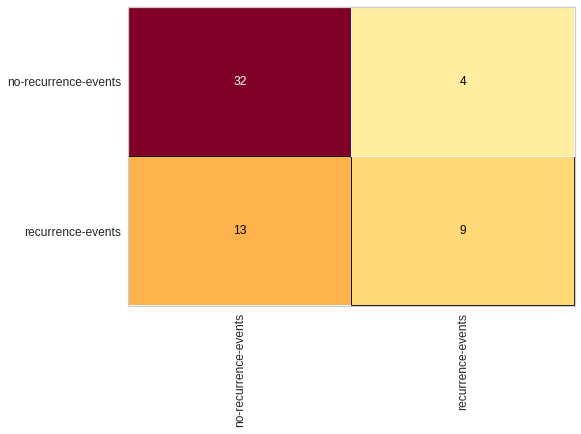

In [369]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [370]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.71      0.89      0.79        36
   recurrence-events       0.69      0.41      0.51        22

            accuracy                           0.71        58
           macro avg       0.70      0.65      0.65        58
        weighted avg       0.70      0.71      0.69        58



**Vamos balancear os dados usando um método undersampling?**

In [371]:
from imblearn.under_sampling import TomekLinks

In [372]:
balanceamento_under = TomekLinks(sampling_strategy='all')
X_under, y_under = balanceamento_under.fit_resample(X_treino, y_treino)

In [373]:
X_under.shape, y_under.shape

((202, 38), (202,))

**Quantas instâncias tinha em cada classe originalmente?**

In [374]:
np.unique(y_treino, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([165,  63]))

**Quantas instâncias tem agora após o balanceamento?**

In [375]:
np.unique(y_under, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([152,  50]))

**Vamos ver se o balanceamento melhorou a qualidade do modelo?**

In [376]:
modelo2 = RandomForestClassifier(n_estimators=100, max_features=6, criterion='gini', random_state = 0)
modelo2.fit(X_under, y_under)

RandomForestClassifier(max_features=6, random_state=0)

In [377]:
previsoes = modelo2.predict(X_teste)

In [378]:
accuracy_score(y_teste,previsoes)

0.6896551724137931

0.6896551724137931

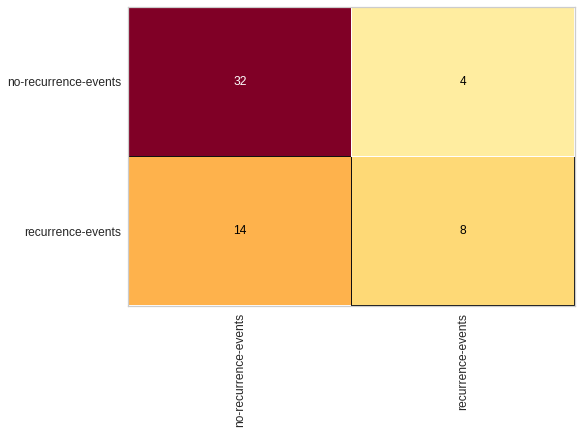

In [379]:
cm = ConfusionMatrix(modelo2)
cm.fit(X_under, y_under)
cm.score(X_teste, y_teste)

In [380]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.70      0.89      0.78        36
   recurrence-events       0.67      0.36      0.47        22

            accuracy                           0.69        58
           macro avg       0.68      0.63      0.63        58
        weighted avg       0.68      0.69      0.66        58

